In [2]:
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt
plt.ion()
import seaborn
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict

# Load the data

In [3]:
coffee_ratings = pd.read_csv('robusta_data_cleaned.csv')
coffee_ratings

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Robusta,ankole coffee producers coop,Uganda,kyangundu cooperative society,NaN,ankole coffee producers,0,ankole coffee producers coop,1488,sheema south western,...,Green,2,"June 26th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1488.0,1488.0,1488.0
2,Robusta,nishant gurjer,India,sethuraman estate kaapi royale,25,sethuraman estate,14/1148/2017/21,kaapi royale,3170,chikmagalur karnataka indua,...,NaN,2,"October 31st, 2018",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,3170.0,3170.0,3170.0
3,Robusta,andrew hetzel,India,sethuraman estate,NaN,NaN,0000,sethuraman estate,1000m,chikmagalur,...,Green,0,"April 29th, 2016",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,1000.0,1000.0,1000.0
4,Robusta,ugacof,Uganda,ugacof project area,NaN,ugacof,0,ugacof ltd,1212,central,...,Green,7,"July 14th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1212.0,1212.0,1212.0
5,Robusta,katuka development trust ltd,Uganda,katikamu capca farmers association,NaN,katuka development trust,0,katuka development trust ltd,1200-1300,luwero central region,...,Green,3,"June 26th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1200.0,1300.0,1250.0
6,Robusta,andrew hetzel,India,NaN,NaN,(self),NaN,"cafemakers, llc",3000',chikmagalur,...,Green,0,"February 28th, 2013",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,3000.0,3000.0,3000.0
7,Robusta,andrew hetzel,India,sethuraman estates,NaN,NaN,NaN,cafemakers,750m,chikmagalur,...,Green,0,"May 15th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,750.0,750.0,750.0
8,Robusta,nishant gurjer,India,sethuraman estate kaapi royale,7,sethuraman estate,14/1148/2017/18,kaapi royale,3140,chikmagalur karnataka india,...,Bluish-Green,0,"October 25th, 2018",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,3140.0,3140.0,3140.0
9,Robusta,nishant gurjer,India,sethuraman estate,RKR,sethuraman estate,14/1148/2016/17,kaapi royale,1000,chikmagalur karnataka,...,Green,0,"August 17th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,1000.0,1000.0,1000.0
10,Robusta,ugacof,Uganda,ishaka,NaN,nsubuga umar,0,ugacof ltd,900-1300,western,...,Green,6,"August 5th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,900.0,1300.0,1100.0


## Select columns for modeling
We will select columns to use for modeling. Here it is a mixture of categorical and numerical variables. Rows with nan's will be be assigned mean values in altitude_mean_meters column leaving us with about 28 rows to use for modeling.

In [50]:
coffee_df = coffee_ratings[['total_cup_points',
                            'country_of_origin',
                            'aroma',
                            'aftertaste',
                            'acidity',
                            'body',
                            'balance',
                            'sweetness',
                            'altitude_mean_meters']]
# coffee_df = coffee_df.dropna()
altitude_mean_meters = coffee_df.altitude_mean_meters.fillna(coffee_df.altitude_mean_meters.mean())
coffee_df = coffee_df.drop('altitude_mean_meters', axis = 1)
coffee_df['altitude_mean_meters'] = altitude_mean_meters
coffee_df

,total_cup_points,country_of_origin,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters
1,83.75,Uganda,7.83,7.75,7.92,8.00,8.25,7.92,1488.0
2,83.50,India,8.00,7.92,8.00,8.00,7.92,7.92,3170.0
3,83.25,India,7.92,7.92,8.00,7.83,7.83,7.92,1000.0
4,83.00,Uganda,8.00,7.92,7.75,7.75,7.83,7.75,1212.0
5,83.00,Uganda,8.33,7.83,7.75,7.58,8.25,7.75,1250.0
6,82.75,India,8.00,7.67,8.00,7.75,7.75,7.92,3000.0
7,82.58,India,7.67,7.83,7.83,8.00,7.92,7.75,750.0
8,82.50,India,7.67,7.83,7.67,7.92,7.92,7.83,3140.0
9,82.50,India,7.67,7.58,7.83,7.92,7.83,8.00,1000.0
10,82.42,Uganda,7.67,7.83,7.83,7.75,7.92,7.75,1100.0


Categorical columns like country of origin need to be converted from categorical typies to numerical values for modeling.

In [27]:
ord_enc = OrdinalEncoder()
coffee_df["country_of_origin"] = ord_enc.fit_transform(coffee_df[["country_of_origin"]])
country_of_origin = coffee_df.country_of_origin.unique()
country_of_origin

array([2., 1., 3., 0., 4.])

# View the relation between the variables
With a pairplot we can see the marginal and join distributions of the features with which we are working.

Features like aroma, aftertaste, acidity, body, and balance exist in a fairly narrow range amongst variables like variety and country of origin. Interestingly the country of origin and variaty seem to have no strong relation with each other whatsoever. Furthermore, most of the coffees in this dataset appear to be grown above 500m in altitudes. Overall, there doesn't seem to be any strong correlations between the features.

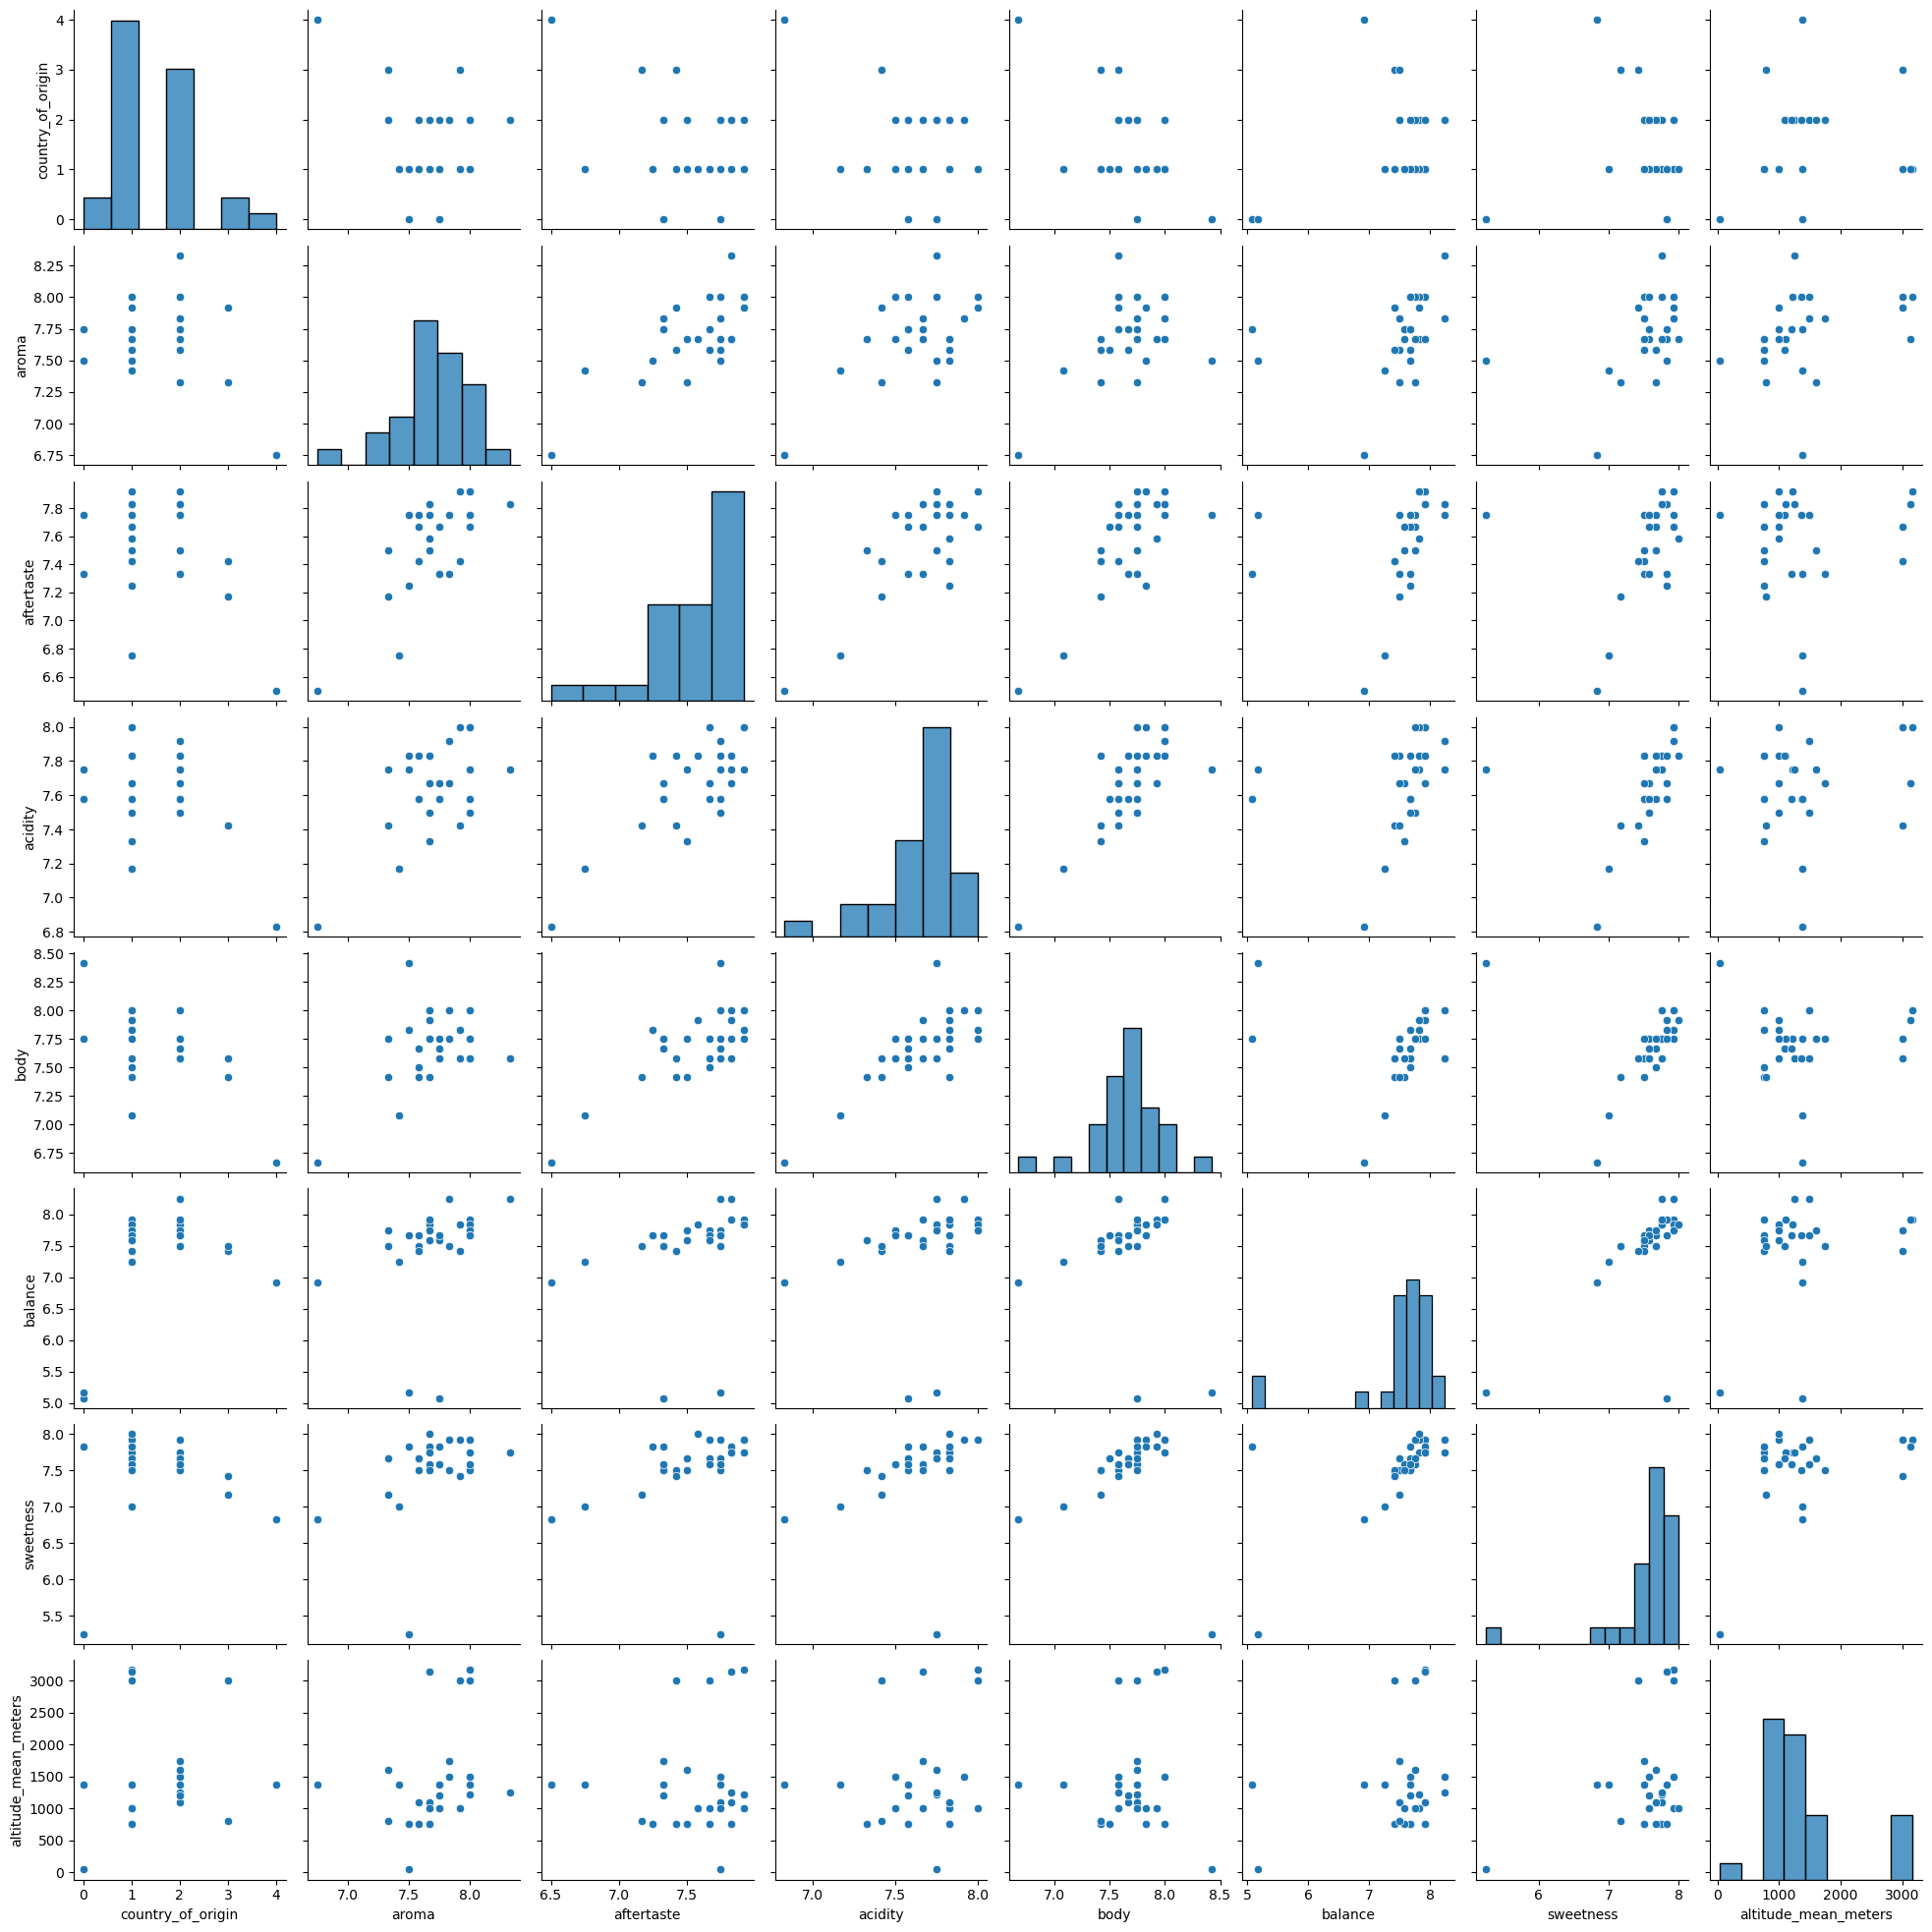

In [28]:
seaborn.pairplot(coffee_df.drop('total_cup_points', axis = 1)) 

The relations between the features appear more prominent. The features from aroma to balance appear to have a positive correlation amongst each other.

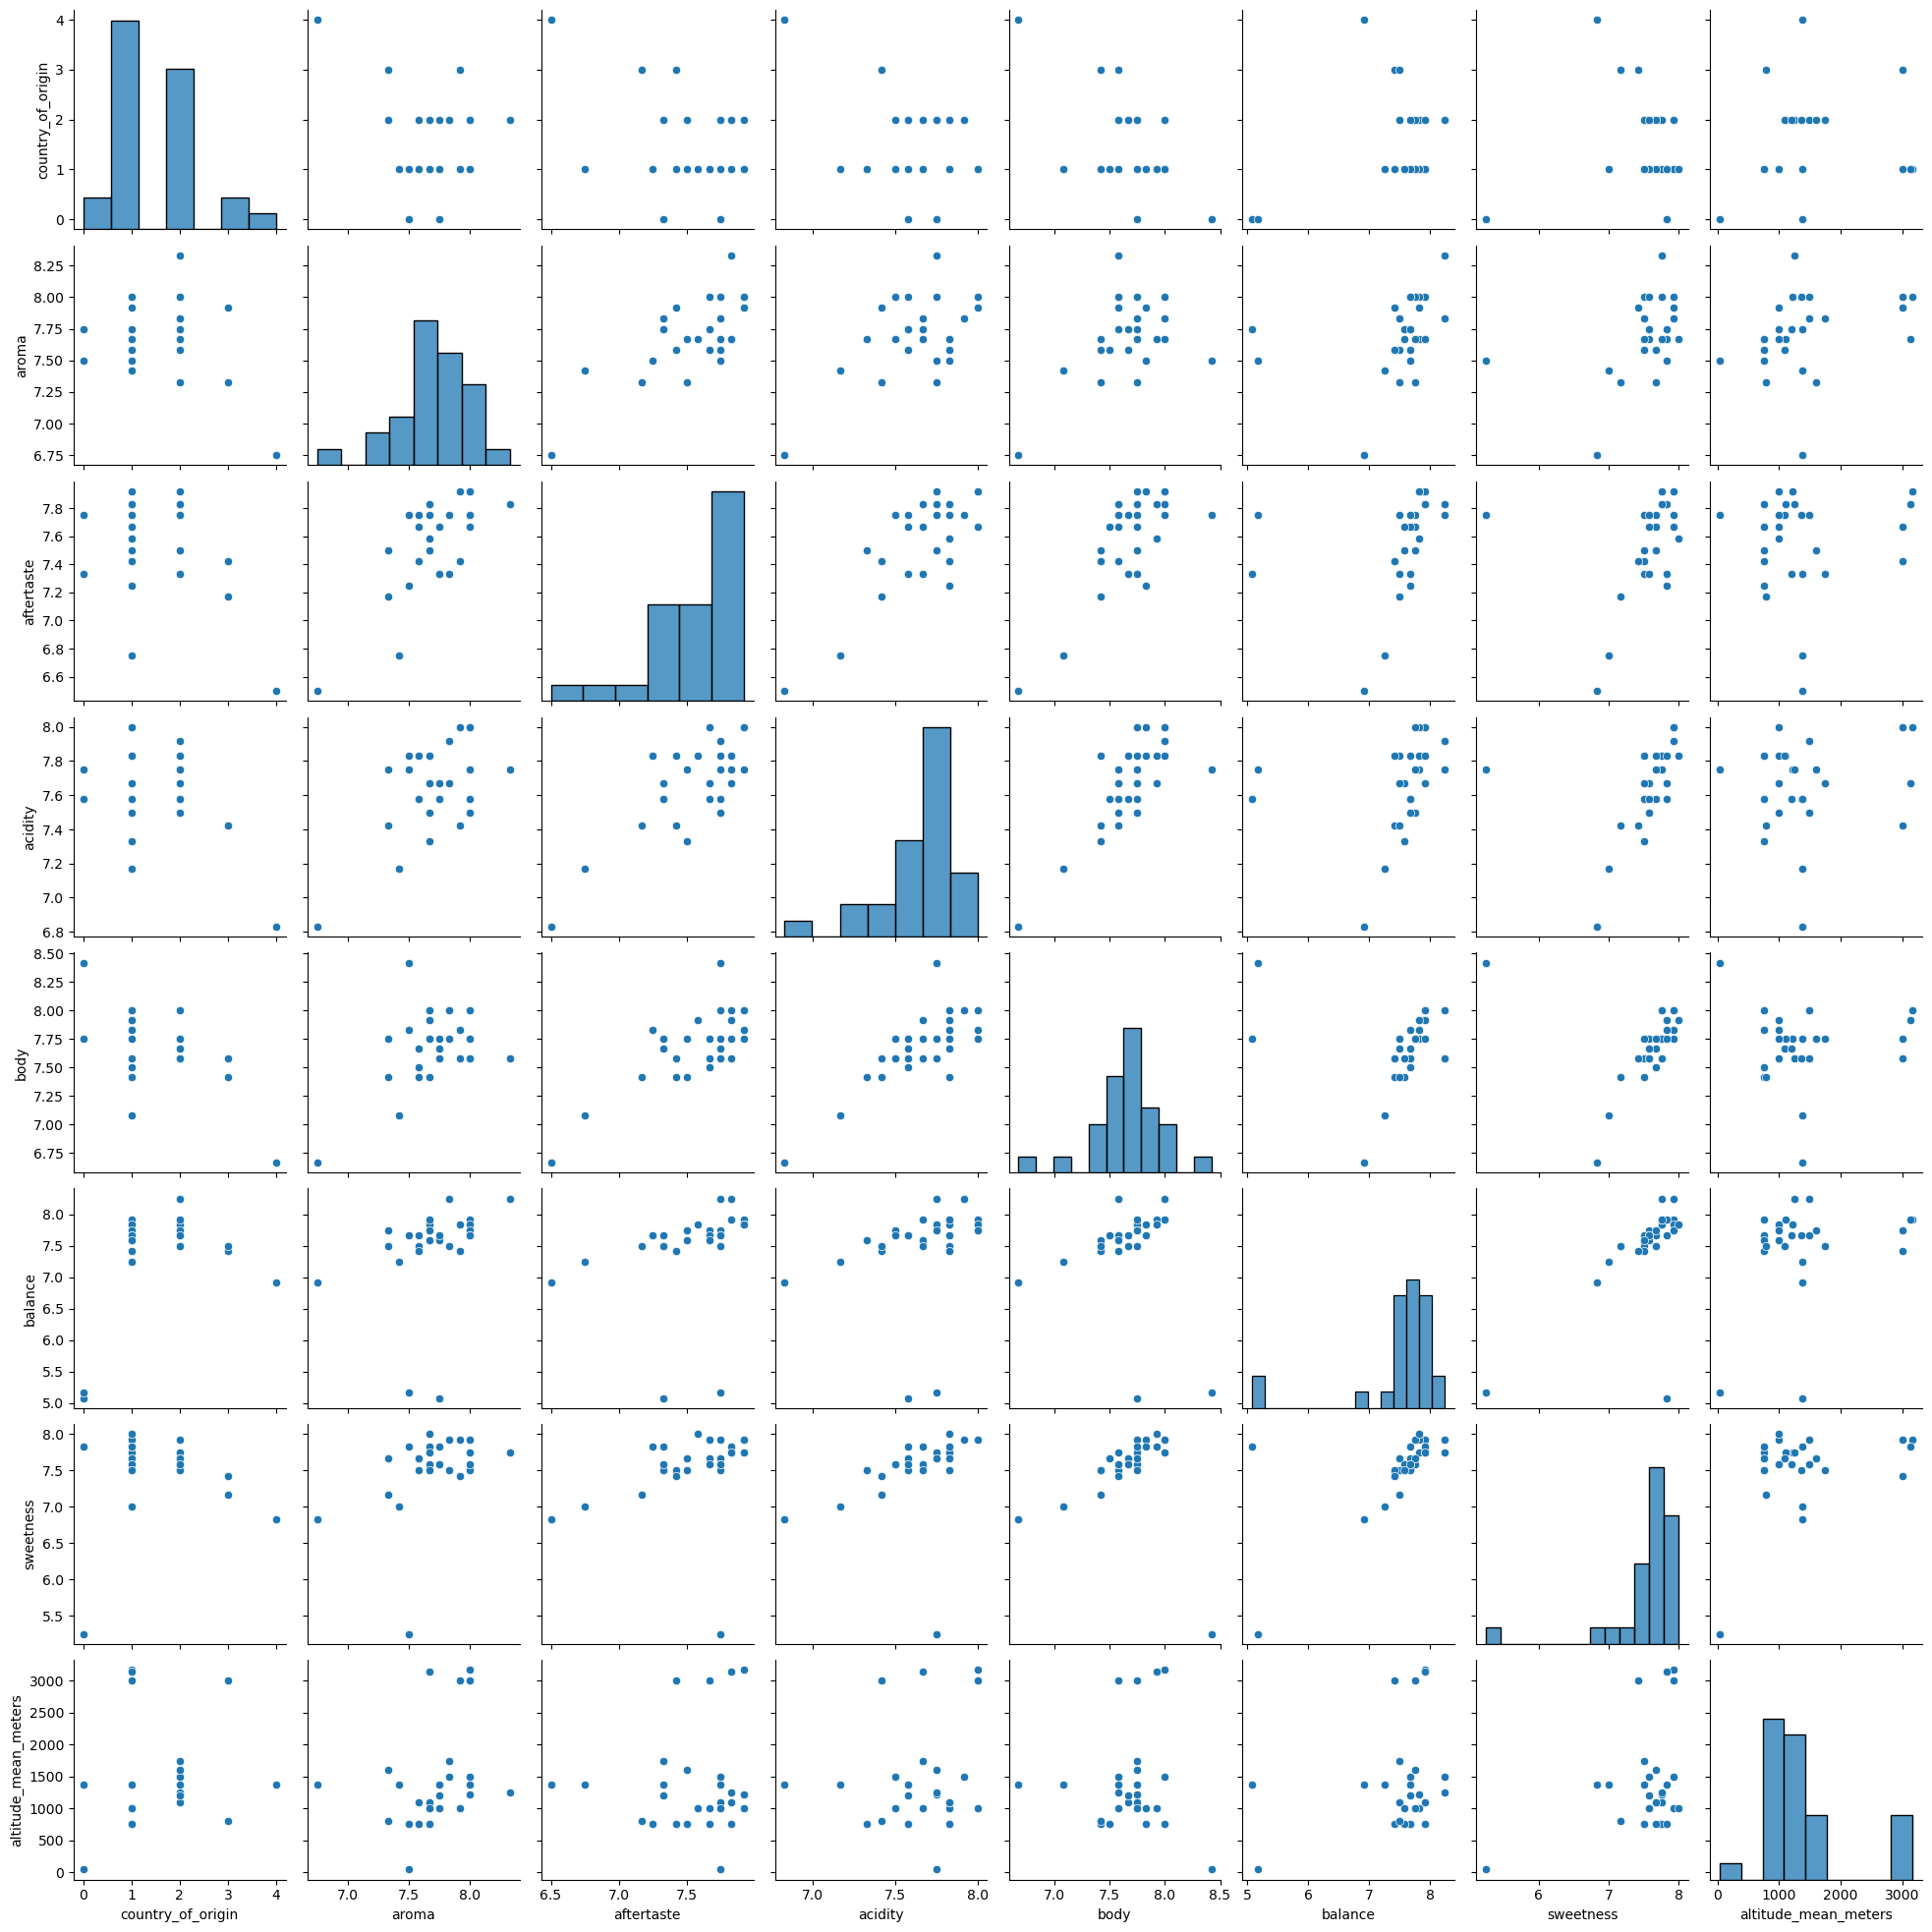

In [30]:
seaborn.pairplot(coffee_df.drop('total_cup_points', axis = 1)) 

We can also construct a correlation matrix from the dataframe to view the correlations between the features.

The features from sweetness to aroma appear to have a strong positive correlation with the total cup points. Features from aftertaste to body appear to have strong positive correlations amonst themselves. Furthermore, the country_of_origin appears to be negatively correlated with each other and the total cupping points. Interestingly there is a strong negetive correlation between body and country of origin and negative corelation between body and balance and country of origin with acidity, aftertaste and aroma .

<AxesSubplot:>

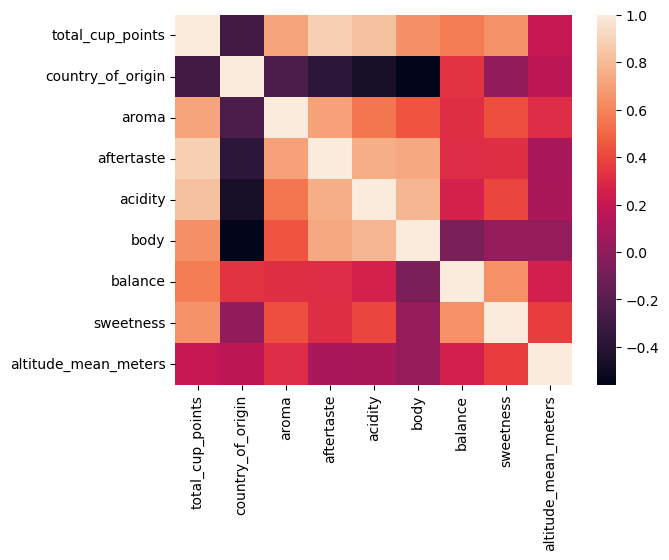

In [31]:
seaborn.heatmap(coffee_df.corr(),
                xticklabels=coffee_df.columns,
                yticklabels=coffee_df.columns)

Let us determine the number of unique scores in this dataset. There appears to be 23. I will reduce this to three to split the ratings into: Do Not Drink, Bad ,Decent, Good, Amazing.

In [33]:
len(coffee_df['total_cup_points'].unique())

23

Let's also view the distribution of the results to determine cutoffs for the Five categories.

Text(0, 0.5, 'Count')

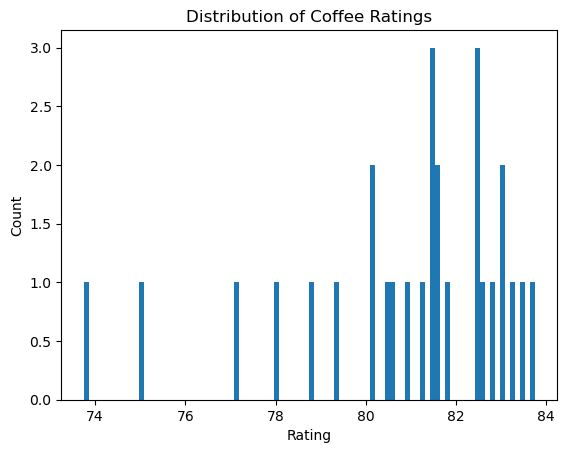

In [34]:
plt.hist(coffee_df['total_cup_points'], bins = 90)
plt.title("Distribution of Coffee Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

In [35]:
rating_pctile = np.percentile(coffee_df['total_cup_points'], [20, 40, 60, 80])
rating_pctile

array([79.666, 81.184, 81.614, 82.682])

## Create new column to create new assignments to the ratings
Do not Drink(0-20) will be labeled as 1, Bad(20-40) labeled as 2, Decent(40-60) will be labeled as 3, Good(60-80) will be labeled as 4 and Amazing(8--100) will be labeled as 5.

In [37]:
coffee_df['n_rating'] = 0
coffee_df['n_rating'] = np.where(coffee_df['total_cup_points'] < rating_pctile[0], 1, coffee_df['n_rating'])
coffee_df['n_rating'] = np.where((coffee_df['total_cup_points'] >= rating_pctile[0]) & (coffee_df['total_cup_points'] <= rating_pctile[1]), 2, coffee_df['n_rating'])
coffee_df['n_rating'] = np.where((coffee_df['total_cup_points'] >= rating_pctile[1]) & (coffee_df['total_cup_points'] <= rating_pctile[2]), 3, coffee_df['n_rating'])
coffee_df['n_rating'] = np.where((coffee_df['total_cup_points'] > rating_pctile[2]) & (coffee_df['total_cup_points'] <= rating_pctile[3]), 4, coffee_df['n_rating'])
coffee_df['n_rating'] = np.where(coffee_df['total_cup_points'] > rating_pctile[3], 5, coffee_df['n_rating'])
coffee_df.n_rating.unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [38]:
coffee_df

,total_cup_points,country_of_origin,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,n_rating
1,83.75,2.0,7.83,7.75,7.92,8.00,8.25,7.92,1488.0,5
2,83.50,1.0,8.00,7.92,8.00,8.00,7.92,7.92,3170.0,5
3,83.25,1.0,7.92,7.92,8.00,7.83,7.83,7.92,1000.0,5
4,83.00,2.0,8.00,7.92,7.75,7.75,7.83,7.75,1212.0,5
5,83.00,2.0,8.33,7.83,7.75,7.58,8.25,7.75,1250.0,5
6,82.75,1.0,8.00,7.67,8.00,7.75,7.75,7.92,3000.0,5
7,82.58,1.0,7.67,7.83,7.83,8.00,7.92,7.75,750.0,4
8,82.50,1.0,7.67,7.83,7.67,7.92,7.92,7.83,3140.0,4
9,82.50,1.0,7.67,7.58,7.83,7.92,7.83,8.00,1000.0,4
10,82.42,2.0,7.67,7.83,7.83,7.75,7.92,7.75,1100.0,4


## View distribution of n_rating

(array([6., 0., 5., 0., 0., 6., 0., 5., 0., 6.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

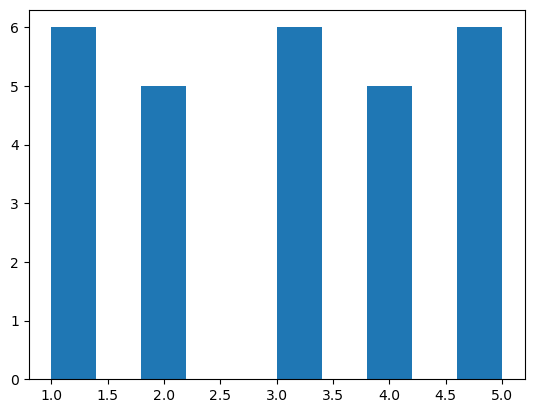

In [39]:
plt.hist(coffee_df['n_rating'])

In [40]:
coffee_df.drop(['total_cup_points', 'n_rating'], axis = 1)

,country_of_origin,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters
1,2.0,7.83,7.75,7.92,8.00,8.25,7.92,1488.0
2,1.0,8.00,7.92,8.00,8.00,7.92,7.92,3170.0
3,1.0,7.92,7.92,8.00,7.83,7.83,7.92,1000.0
4,2.0,8.00,7.92,7.75,7.75,7.83,7.75,1212.0
5,2.0,8.33,7.83,7.75,7.58,8.25,7.75,1250.0
6,1.0,8.00,7.67,8.00,7.75,7.75,7.92,3000.0
7,1.0,7.67,7.83,7.83,8.00,7.92,7.75,750.0
8,1.0,7.67,7.83,7.67,7.92,7.92,7.83,3140.0
9,1.0,7.67,7.58,7.83,7.92,7.83,8.00,1000.0
10,2.0,7.67,7.83,7.83,7.75,7.92,7.75,1100.0


# Split the data into training and testing sets

In [41]:
X = coffee_df.drop(['total_cup_points', 'n_rating'], axis = 1)
y = coffee_df['n_rating']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .25, random_state = 42)

## Normalize the features

In [42]:
# Normalize the data
sc = StandardScaler()
normed_train_data = pd.DataFrame(sc.fit_transform(training), columns = X.columns)
normed_test_data = pd.DataFrame(sc.fit_transform(testing), columns = X.columns)

### Visualize Normalized Train Data

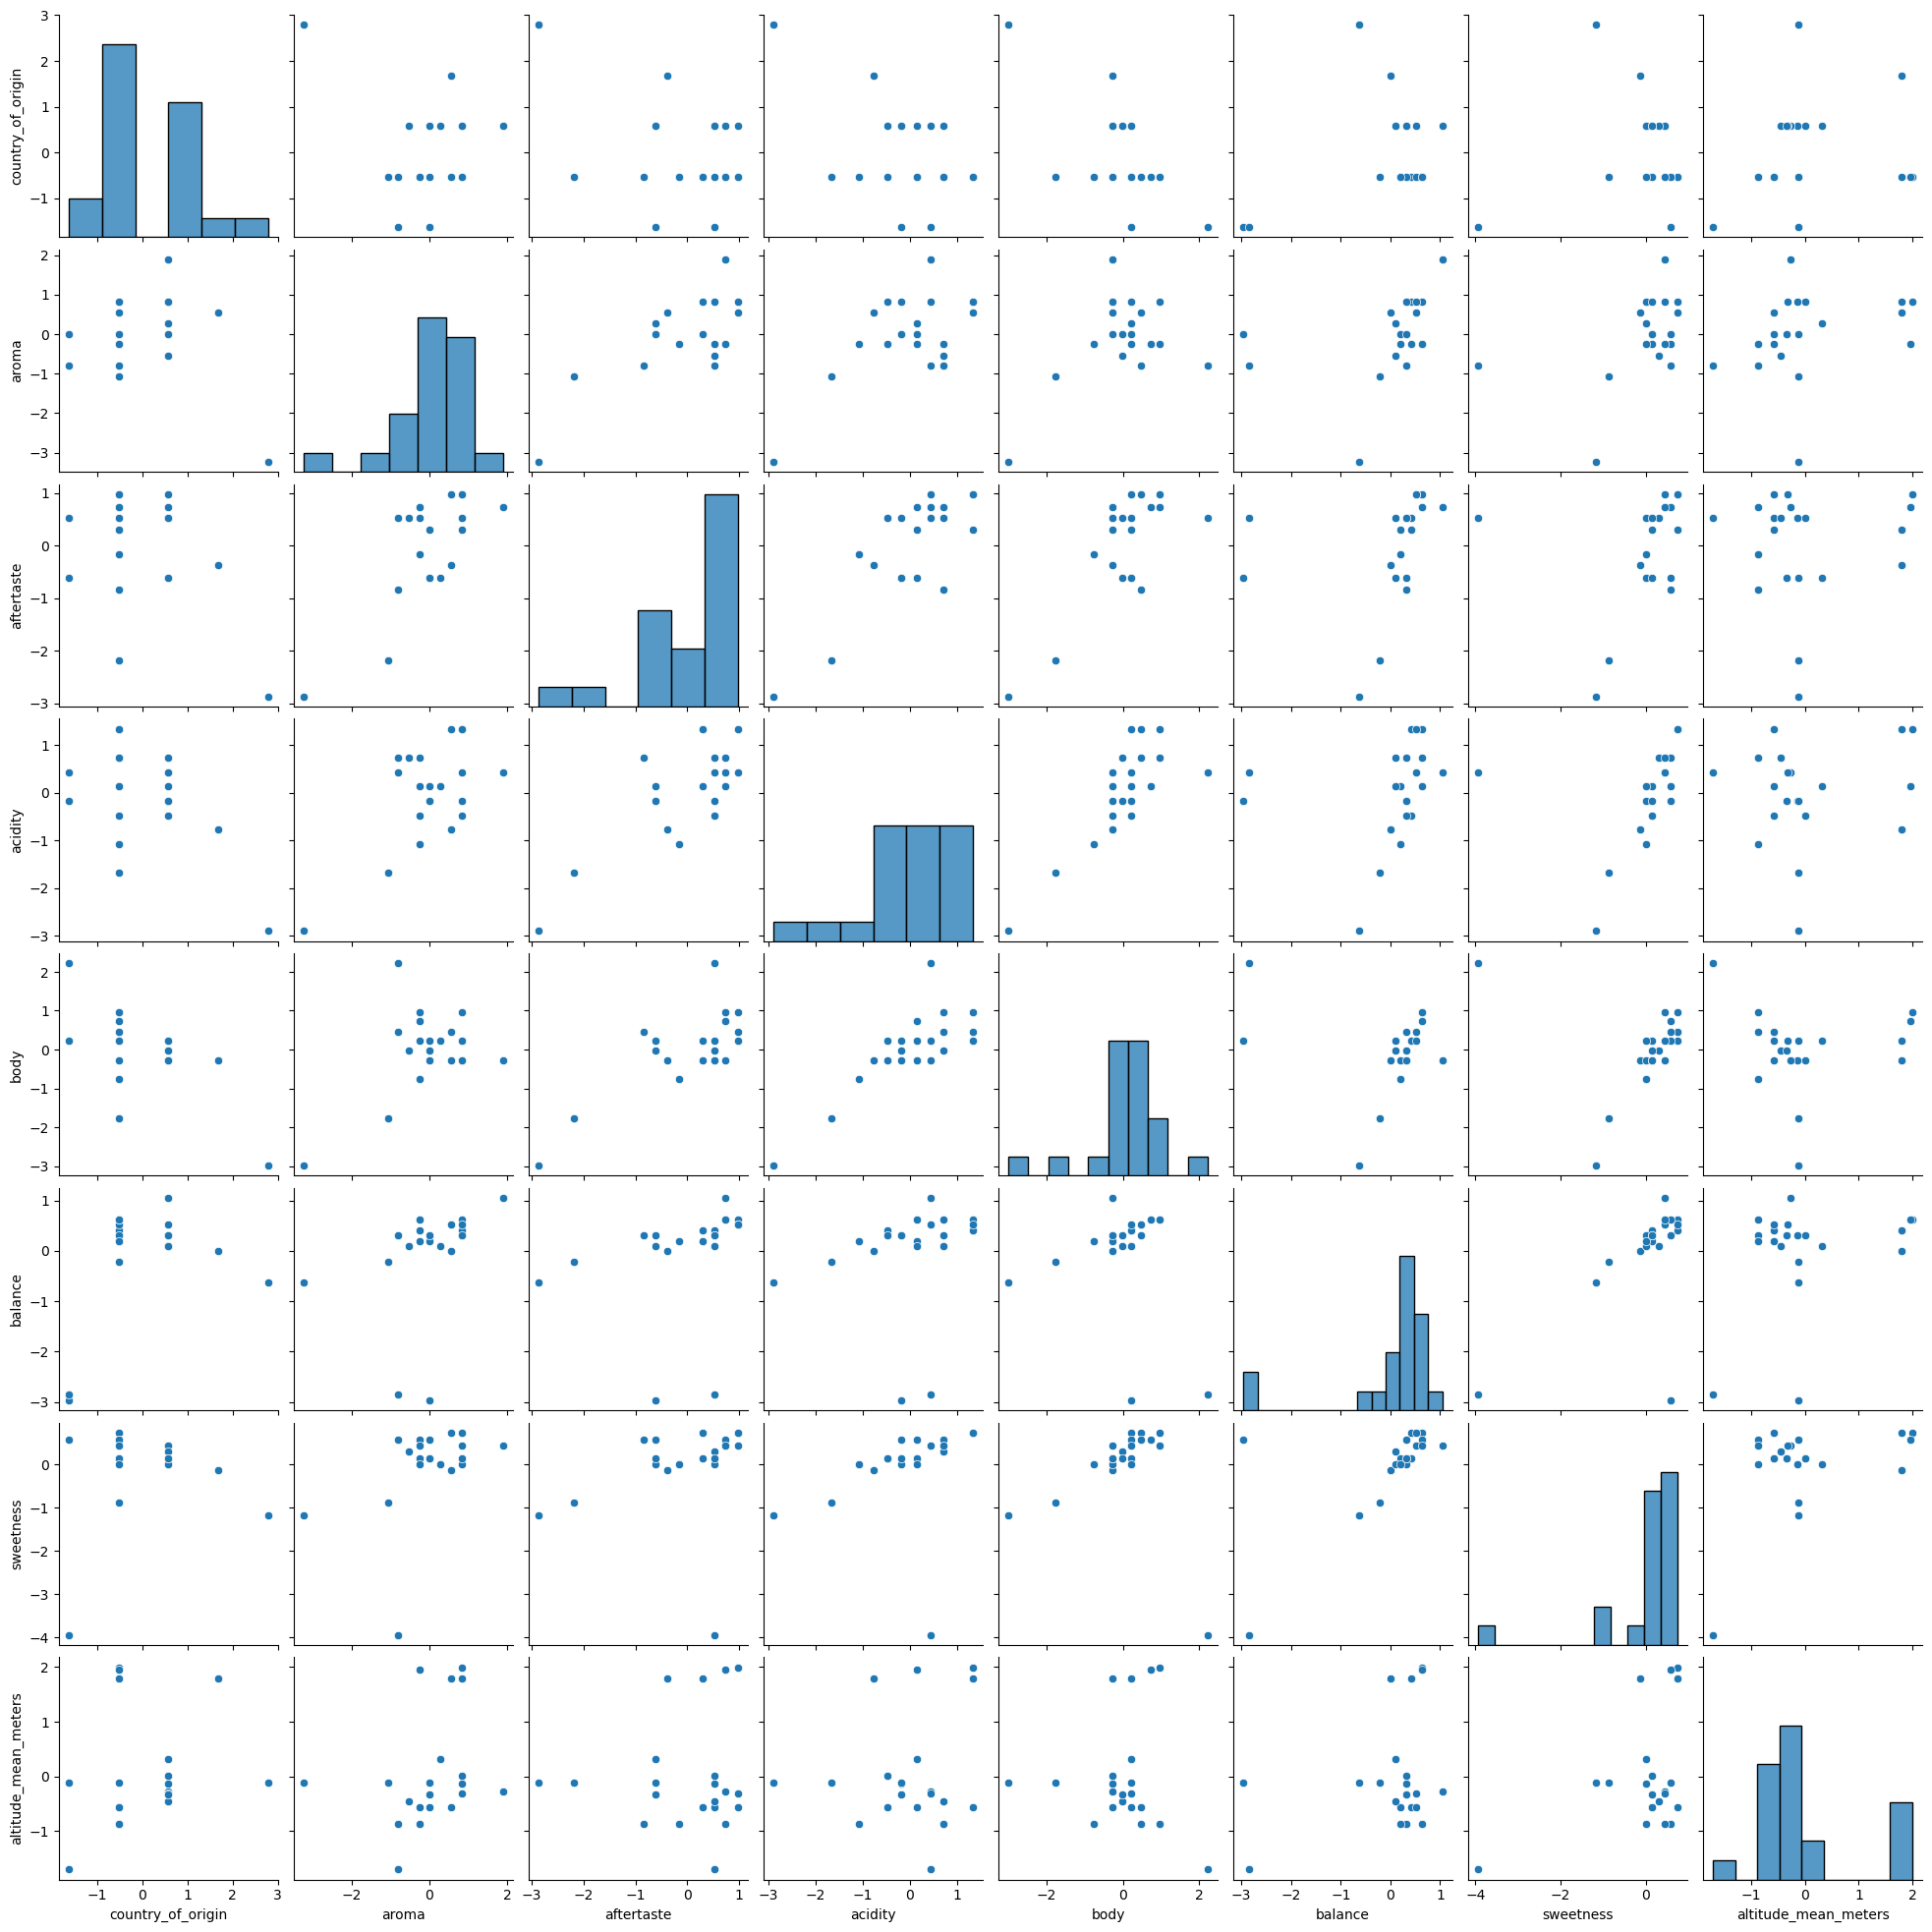

In [43]:
seaborn.pairplot(normed_train_data) 

# Random Forest Classifier

In [44]:
clf=RandomForestClassifier()
clf.fit(training, training_labels)

RandomForestClassifier()

In [45]:
preds = clf.predict(testing)

We can see this model scores 100% accuracy on both training and testing labels. So there is no further need to optimize the classifier.

In [46]:
print (clf.score(training, training_labels))
print(clf.score(testing, testing_labels))

1.0
1.0


# Finding important features from random forest

We can see that balance, sweetness and aftertaste heavily contribute towards total_cup_points.

In [47]:
pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)

,0
balance,0.229754
sweetness,0.186682
aftertaste,0.137542
aroma,0.133022
acidity,0.117687
altitude_mean_meters,0.082756
body,0.073001
country_of_origin,0.039557


## Evaluating Results
The first column represents the coffees with a ‘Do not Drink’ rating, the second column represents the coffees with an ‘Bad’ rating, the third column represents the coffee with a ‘Decent’ rating, the fourth column represents the coffee with a ‘Good’ rating and the fifth column represents the coffee with a ‘Amazing’ rating. The numbers on the diagonal of the matrix, 1, 2, 1, 2 and 1 represent the number of coffees the model has accurately classified. The off diagonal values represent the misclassidied data.


In [49]:
metrics.confusion_matrix(testing_labels, preds,  labels = [1, 2, 3, 4, 5])

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 1]], dtype=int64)

# Optimizing the random forest

This section was not performed as the accuracy of classifier was 100% across training and testing labels

In [51]:
# Number of trees in random forest
# n_estimators = np.linspace(100, 3000, int((3000-100)/50) + 1, dtype=int)
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]

# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1.0, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']


random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

random_grid

{'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
        2378, 2585, 2792, 3000]),
 'max_depth': [1, 5, 10, 20, 50, 75, 100, 150, 200],
 'min_samples_split': [1.0, 2, 5, 10, 15, 20, 30],
 'min_samples_leaf': [1, 2, 3, 4],
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy']}

### Random Grid Search the parameter space defined above

In [52]:
import time

In [54]:
t1 = time.time()
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)

rf_random.fit(training, training_labels)
t2 = time.time()

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [55]:
print ("It took %s to run"%(str((t2-t1)/60)))

It took 1.108615771929423 to run


In [56]:
# Best Parameters
rf_random.best_params_

{'n_estimators': 2171,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 200,
 'criterion': 'gini',
 'bootstrap': True}

# Fine tune using the results from random grid search as a starting point
Use grid search

In [57]:
param_grid = {
    'n_estimators': np.linspace(850, 950, 10, dtype = int),
    'max_depth': [46, 48, 50, 52, 54],
    'min_samples_split': [13, 14, 15, 16, 17],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

In [59]:
t3 = time.time()
# Base model
rf_grid = RandomForestClassifier(criterion = 'entropy', bootstrap = True)
# Instantiate the grid search model
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 5, n_jobs = 8, verbose = 2)
grid_rf_search.fit(training, training_labels)
t4 = time.time()

Fitting 5 folds for each of 1250 candidates, totalling 6250 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [64]:
best_rf_grid = grid_rf_search.best_estimator_
best_rf_grid

RandomForestClassifier(criterion='entropy', max_depth=46, min_samples_split=13,
                       n_estimators=850)

In [65]:
print ("It took %s to run"%(str((t4-t3)/60)))

It took 15.510495940844217 to run


In [66]:
# Best Parameters
grid_rf_search.best_params_

{'max_depth': 46,
 'min_samples_leaf': 1,
 'min_samples_split': 13,
 'n_estimators': 850}

In [67]:
grid_preds = grid_rf_search.predict(testing)

In [68]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(testing_labels, grid_preds))

Accuracy: 0.42857142857142855


In [69]:
# Feature Importance
pd.DataFrame(best_rf_grid.feature_importances_, index=training.columns).sort_values(by=0, ascending=False)

,0
balance,0.223148
sweetness,0.191781
aftertaste,0.182792
aroma,0.157794
acidity,0.109524
body,0.058173
altitude_mean_meters,0.045116
country_of_origin,0.031672


In [71]:
metrics.confusion_matrix(testing_labels, preds,  labels = [1, 2, 3, 4, 5])

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 1]], dtype=int64)